In [1]:
import tensorflow as tf
import numpy as np
import math
na = np.newaxis
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline

# import helper functions from utils.py:
from utils import tf_tril_indices, load_lookup_table, table_lookup_op_parallel, get_scp_samples, train_parameters, evaluation

In [2]:
disasters_array = np.array([ 4, 5, 4, 0, 1, 4, 3, 4, 0, 6, 3, 3, 4, 0, 2, 6,
                   3, 3, 5, 4, 5, 3, 1, 4, 4, 1, 5, 5, 3, 4, 2, 5,
                   2, 2, 3, 4, 2, 1, 3, 2, 2, 1, 1, 1, 1, 3, 0, 0,
                   1, 0, 1, 1, 0, 0, 3, 1, 0, 3, 2, 2, 0, 1, 1, 1,
                   0, 1, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 2,
                   3, 3, 1, 1, 2, 1, 1, 1, 1, 2, 4, 2, 0, 0, 1, 4,
                   0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1])

In [5]:
data_samples = np.array([])
tmp = [(i+np.linspace(0,1,disasters_array[i]+2)[1:-1]) for i in np.arange(disasters_array.shape[0])]

for j in np.arange(len(tmp)):
    data_samples = np.append(data_samples, tmp[j])

print(data_samples)

[   0.2           0.4           0.6           0.8           1.16666667
    1.33333333    1.5           1.66666667    1.83333333    2.2           2.4
    2.6           2.8           4.5           5.2           5.4           5.6
    5.8           6.25          6.5           6.75          7.2           7.4
    7.6           7.8           9.14285714    9.28571429    9.42857143
    9.57142857    9.71428571    9.85714286   10.25         10.5          10.75
   11.25         11.5          11.75         12.2          12.4          12.6
   12.8          14.33333333   14.66666667   15.14285714   15.28571429
   15.42857143   15.57142857   15.71428571   15.85714286   16.25         16.5
   16.75         17.25         17.5          17.75         18.16666667
   18.33333333   18.5          18.66666667   18.83333333   19.2          19.4
   19.6          19.8          20.16666667   20.33333333   20.5
   20.66666667   20.83333333   21.25         21.5          21.75         22.5
   23.2          23.4      

In [ ]:
Tlims = np.array([[0, 120]])
m_val,S_val,Kzz_inv,alphas_vals,Z,g_val = train_parameters(np.expand_dims(data_samples,1), 5, Tlims, optimize_inducing_points = True, train_hyperparameters = True, learning_rate=0.0001, max_iterations = 1000, gamma_init = 1., alphas_init = 1, log_dir=None, run_prefix=None)

Begin training


[ 150.33314514] 12.5926 [ 3.09722376  1.83506489  1.25827658  1.58791113  1.02483153]


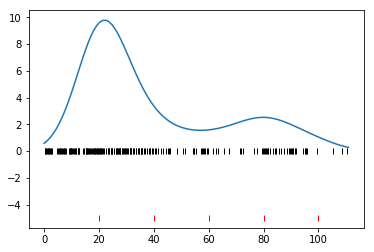

In [7]:
eval_points = np.expand_dims(np.linspace(0, 111, 100),axis=1)

print(alphas_vals, g_val,m_val)
lam = evaluation(m_val,S_val,Kzz_inv,alphas_vals,g_val,Z,eval_points)
plt.plot(eval_points,lam)
plt.plot(data_samples,np.zeros(data_samples.shape[0]),'k|')
plt.plot(Z,np.zeros(Z.shape[0])-5,'r|')
plt.show()